# Notebook Import and Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm #color map

from sympy import symbols, diff
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

# Example 1 - A simple cost function

## $f(x) = x^2 + x + 1$

In [2]:
def f(x):
    return x**2+x+1

In [3]:
# Make Data
x_1 = np.linspace(start=-3, stop=3, num=100)

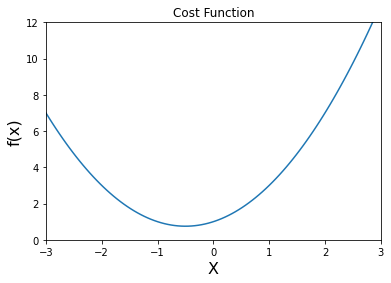

In [4]:
# Plot
plt.xlim([-3,3])
plt.ylim([0,12])
plt.title('Cost Function')
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1))
plt.show()

## Slope & Derivative

In [5]:
def df(x):
    return 2*x + 1

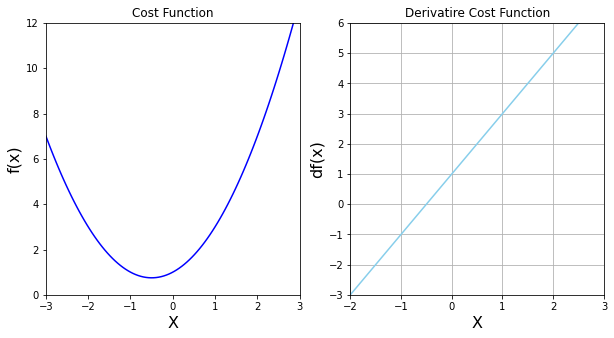

In [6]:
# Plot function and derivative side by side

plt.figure(figsize=[10,5])

# 1 Chart: Cost Function
plt.subplot(1, 2, 1)

plt.xlim([-3,3])
plt.ylim([0,12])
plt.title('Cost Function')
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue')

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.xlim([-2,3])
plt.ylim([-3,6])
plt.title('Derivatire Cost Function')
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.plot(x_1, df(x_1), color='skyblue')

plt.show()

## Python Loops & Gradiente Descent

In [7]:
# Python For Loop
for n in range(5):
    print('Hello', n)

Hello 0
Hello 1
Hello 2
Hello 3
Hello 4


In [8]:
# Python While Loop
counter = 0
while counter < 5:
    print('World', counter)
    counter = counter+1
    

World 0
World 1
World 2
World 3
World 4


In [9]:
# Gradiente Descent

new_x = -3
previous_x = 0
step_multiplier = 0.1
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(200):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    if abs(new_x - previous_x) < precision:
        print(n)
        break
    
print('Local minimum accours at:', new_x)
print('Slope or df(x) value at this point is:', df(new_x))
print('f(x) value or cost at this point is:',f(new_x))

49
Local minimum accours at: -0.5000356811923176
Slope or df(x) value at this point is: -7.136238463512079e-05
f(x) value or cost at this point is: 0.7500000012731475


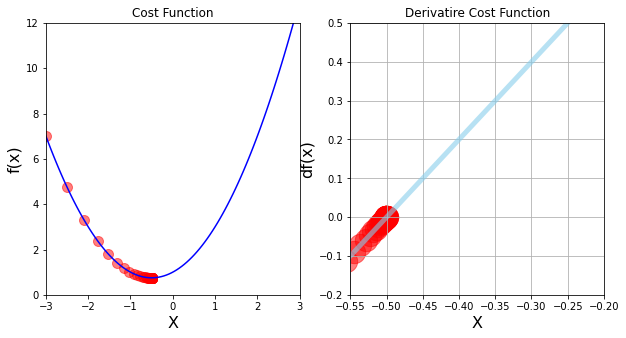

In [10]:
# Superimpose the gradient descent calculations on plot

plt.figure(figsize=[10,5])

# 1 Chart: Cost Function
plt.subplot(1, 2, 1)

plt.xlim([-3,3])
plt.ylim([0,12])
plt.title('Cost Function')
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue')

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.5)

# 2 Chart: Derivative (Close up)
plt.subplot(1, 2, 2)

plt.xlim([-0.55,-0.2])
plt.ylim([-0.2,0.5])
plt.title('Derivatire Cost Function')
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()

plt.plot(x_1, df(x_1), color='skyblue',linewidth=5, alpha=0.6)
plt.scatter(x_list,slope_list, color='red', s=500,alpha=0.5)


plt.show()

# Exemple 2 - Multiple Minima vs Initial Guess & Advanced Functions

## $g(x) = x^4 - 4x^2 + 5$

In [11]:
# Make some data
x_2 = np.linspace(-2,2,1000)

# g(x)
def g(x):
    return x**4 - 4*x**2 + 5

# dg(x)
def dg(x):
    return 4*x**3 - 8*x

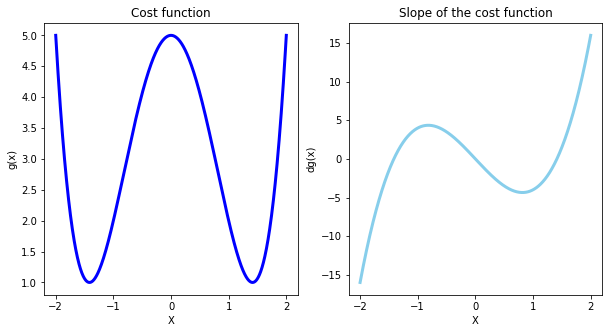

In [12]:

plt.figure(figsize =[10,5])

#Plot g(x)
plt.subplot(1,2,1)
plt.title('Cost function')
plt.xlabel('X')
plt.ylabel('g(x)')

plt.plot(x_2,g(x_2),linewidth=3,color='blue')


#Plot dg(x)
plt.subplot(1,2,2)

plt.title('Slope of the cost function')
plt.xlabel('X')
plt.ylabel('dg(x)')

plt.plot(x_2,dg(x_2),linewidth=3,color='skyblue')

plt.show()

## Gradiente Descent as a Python Function

In [13]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001,
                    max_iter=300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if abs(new_x - previous_x) < precision:
            break
            
    return new_x,x_list,slope_list


In [14]:
local_min,list_x,deriv_list = gradient_descent(
    derivative_func=dg,
    initial_guess=0.5,
    multiplier=0.01,
    precision=0.001)
print('Local min occurs at:', local_min)
print('Number of steps is:', len(list_x))

Local min occurs at: 1.4090774204884804
Number of steps is: 42


In [15]:

print('Local min occurs at:', local_min)
print('Number of steps is:', len(list_x))

Local min occurs at: 1.4090774204884804
Number of steps is: 42


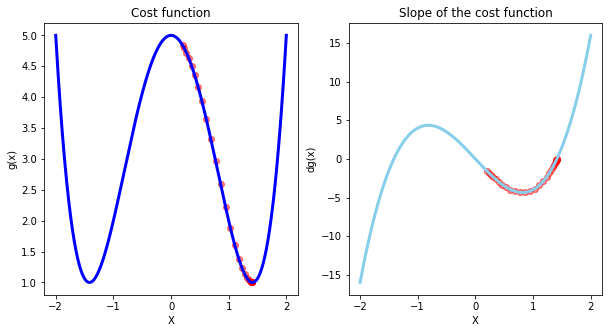

Local min accours at:  1.4125970532782497
Cost at this minimus is:  1.0000208809249256
Number of steps: 30


In [16]:
local_min,list_x,deriv_list = gradient_descent(
    derivative_func=dg,
    initial_guess=0.2)

# Calling gradient descent function

plt.figure(figsize =[10,5])

#Plot g(x)
plt.subplot(1,2,1)
plt.title('Cost function')
plt.xlabel('X')
plt.ylabel('g(x)')

plt.plot(x_2,g(x_2),linewidth=3,color='blue')
values = np.array(list_x)
plt.scatter(list_x,g(values),color='red',alpha=0.5)

#Plot dg(x)
plt.subplot(1,2,2)

plt.title('Slope of the cost function')
plt.xlabel('X')
plt.ylabel('dg(x)')

plt.plot(x_2,dg(x_2),linewidth=3,color='skyblue')
plt.scatter(list_x,deriv_list,color='red',alpha=0.5)

plt.show()

print('Local min accours at: ', local_min)
print('Cost at this minimus is: ', g(local_min))
print('Number of steps:', len(list_x))

 # Example 3 - Divergence Overflow and Python Tuples
 
 ## $h(x) = x^5 - 2x^4 + 2$

In [17]:
#Make data
x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)

def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3

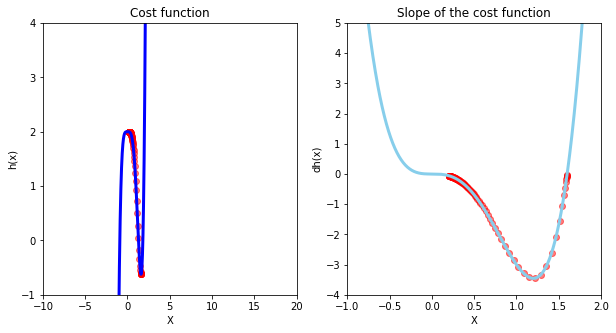

Local min accours at:  1.5989534547394717
Cost at this minimus is:  -0.6214287992331258
Number of steps: 117


In [18]:
local_min,list_x,deriv_list = gradient_descent(
    derivative_func=dh,
    initial_guess=0.2,
    max_iter=500)

# Plot function and derivative and scatter side by side

plt.figure(figsize =[10,5])

#Plot g(x)
plt.subplot(1,2,1)

plt.xlim(-10,20)
plt.ylim(-1,4)

plt.title('Cost function')
plt.xlabel('X')
plt.ylabel('h(x)')

plt.plot(x_3,h(x_3),linewidth=3,color='blue')
values = np.array(list_x)
plt.scatter(list_x,h(values),color='red',alpha=0.5)

#Plot dg(x)
plt.subplot(1,2,2)

plt.xlim(-1,2)
plt.ylim(-4,5)

plt.title('Slope of the cost function')
plt.xlabel('X')
plt.ylabel('dh(x)')

plt.plot(x_3,dh(x_3),linewidth=3,color='skyblue')
plt.scatter(list_x,deriv_list,color='red',alpha=0.5)

plt.show()

print('Local min accours at: ', local_min)
print('Cost at this minimus is: ', h(local_min))
print('Number of steps:', len(list_x))

In [19]:
import sys

# sys.version

type(h(local_min))
sys.float_info.max

1.7976931348623157e+308

## Tuples

In [20]:
# Creating a Tuple - tuple packing
breakfast = 'bacon', 'eggs', 'avocado'
unlucky_numbers = 13, 4, 9, 26, 17

print('I loooove ', breakfast[0])
print('My hotel has no '+ str(unlucky_numbers[1]) +' th floor')

not_my_adress = 1, 'infinit elopp', 'cupertico', 95323
not_my_adress

I loooove  bacon
My hotel has no 4 th floor


(1, 'infinit elopp', 'cupertico', 95323)

# Learning Rate

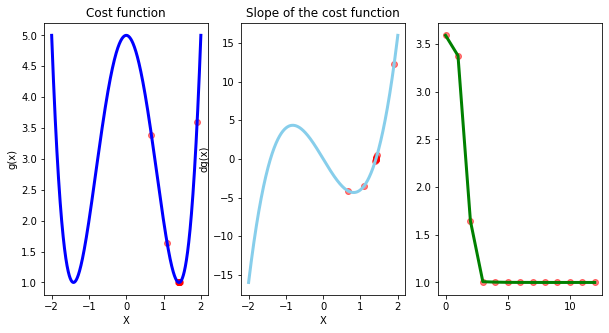

Number of step  13
Local min occurs at  1.4138849348491223
Cost of the minimun is  1.0000008637676436


In [21]:
n=13
local_min,list_x,deriv_list = gradient_descent(
    derivative_func=dg,
    initial_guess=1.9,
    multiplier = 0.1,
    max_iter = n)

# Calling gradient descent function

plt.figure(figsize =[10,5])

#Plot g(x)
plt.subplot(1,3,1)
plt.title('Cost function')
plt.xlabel('X')
plt.ylabel('g(x)')

plt.plot(x_2,g(x_2),linewidth=3,color='blue')
values = np.array(list_x)
plt.scatter(list_x,g(values),color='red',alpha=0.5)

#Plot dg(x)
plt.subplot(1,3,2)

plt.title('Slope of the cost function')
plt.xlabel('X')
plt.ylabel('dg(x)')

plt.plot(x_2,dg(x_2),linewidth=3,color='skyblue')
plt.scatter(list_x,deriv_list,color='red',alpha=0.5)


# Plotting Low learning rate
plt.subplot(1,3,3)

iteration_list = list(range(0,n))

plt.plot(iteration_list,g(np.array(list_x)),linewidth=3,color='green')
plt.scatter(iteration_list,g(np.array(list_x)),color='red',alpha=0.5)



plt.show()

print('Number of step ', len(list_x))
print('Local min occurs at ', local_min)
print('Cost of the minimun is ', g(local_min))

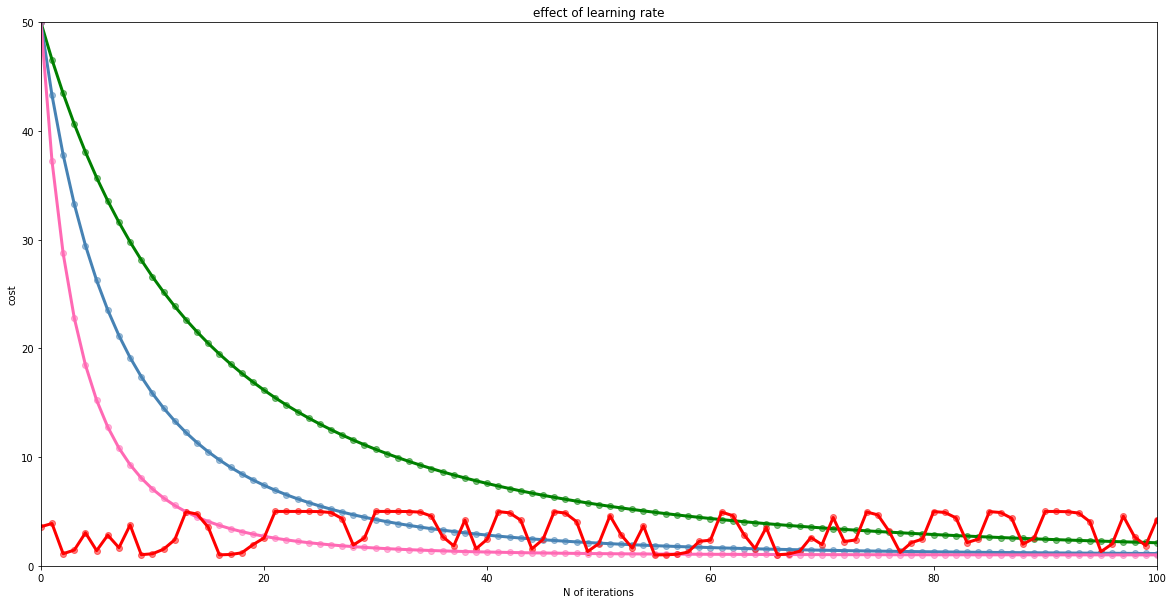

In [22]:
# Run gradient descent 3 times
n=100
low_gamma = gradient_descent(
    derivative_func=dg,
    initial_guess=3,
    multiplier = 0.0005,
    precision=0.0001,
    max_iter = n)

mid_gamma = gradient_descent(
    derivative_func=dg,
    initial_guess=3,
    multiplier = 0.001,
    precision=0.0001,
    max_iter = n)

high_gamma = gradient_descent(
    derivative_func=dg,
    initial_guess=3,
    multiplier = 0.002,
    precision=0.0001,
    max_iter = n)

insane_gamma = gradient_descent(
    derivative_func=dg,
    initial_guess=1.9,
    multiplier = 0.2,
    precision=0.0001,
    max_iter = n)

# Protting reduction in cost for each iteration

plt.figure(figsize =[20,10])

plt.xlim(0,n)
plt.ylim(0,50)

plt.title('effect of learning rate')
plt.xlabel('N of iterations')
plt.ylabel('cost')

#Values for our charts
# 1) Y Axis Data: convert the lists to numpy arrays
low_values = np.array(low_gamma[1])

#2) X Axis Data: create a list from 0 to n+1
iteration_list = list(range(0,n+1))

# Plotting Low learning rate
plt.plot(iteration_list,g(low_values),linewidth=3,color='green')
plt.scatter(iteration_list,g(low_values),color='green',alpha=0.5)

# Plotting Mid learning rate
plt.plot(iteration_list,g(np.array(mid_gamma[1])),linewidth=3,color='steelblue')
plt.scatter(iteration_list,g(np.array(mid_gamma[1])),color='steelblue',alpha=0.5)

# Plotting High learning rate
plt.plot(iteration_list,g(np.array(high_gamma[1])),linewidth=3,color='hotpink')
plt.scatter(iteration_list,g(np.array(high_gamma[1])),color='hotpink',alpha=0.5)

# Plotting High learning rate
plt.plot(iteration_list,g(np.array(insane_gamma[1])),linewidth=3,color='red')
plt.scatter(iteration_list,g(np.array(insane_gamma[1])),color='red',alpha=0.5)





plt.show()

# Example 4 - Data viz with 3d Charts

## Minimise $$f(x,y) = \frac{1}{3^{-x^2-y^2} + 1}$$

Min $$f(x,y) = \frac{1}{r + 1}$$ where $r = 3^{-x^2-y^2}$

In [23]:
def f(x,y):
    r = 3**(-x**2-y**2)
    return 1 / (r+1)

In [24]:
# Make our x and y data
x_4 = np.linspace(start=-2,stop=2,num=200)
y_4 = np.linspace(start=-2,stop=2,num=200)

print('Shap of X array', x_4.shape)

x_4, y_4 = np.meshgrid(x_4,y_4)
print('Array after meshgrid: ', x_4.shape)

Shap of X array (200,)
Array after meshgrid:  (200, 200)


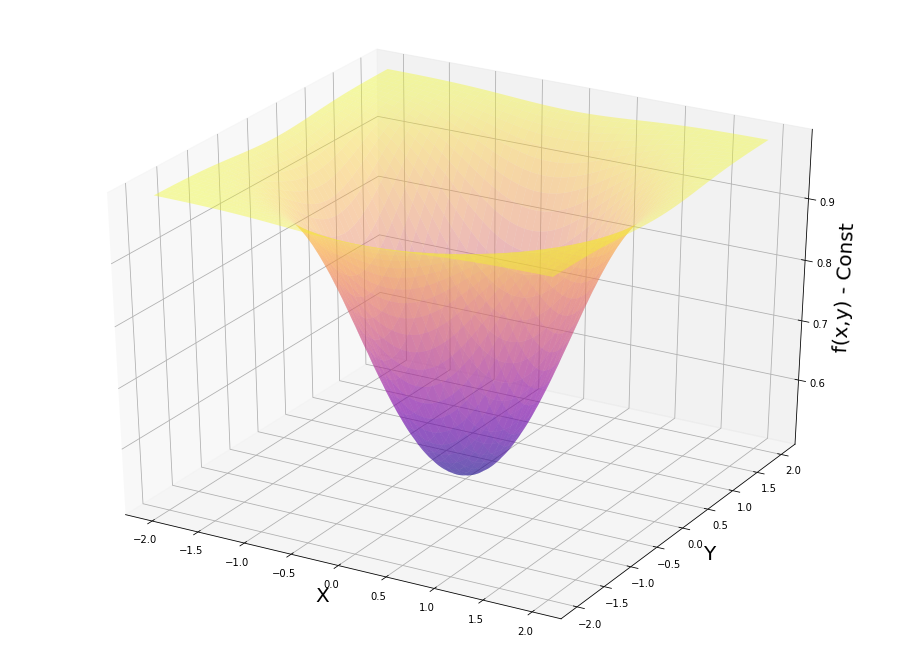

In [25]:
#Generating a 3d plot
fig = plt.figure(figsize =[16,12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x,y) - Const', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.plasma, alpha=0.4)

plt.show()

## Partional Derivatives & Symbolic Computation

## $$\frac{\partial f}{\partial x} = \frac{ 2x \ln(3) \cdot 3^{-x^2 - y^2}}{\left(3^{-x^2 - y^2} + 1\right)^2}$$

## $$\frac{\partial f}{\partial y} = \frac{ 2y \ln(3) \cdot 3^{-x^2 - y^2}}{\left(3^{-x^2 - y^2} + 1\right)^2}$$

In [26]:
a, b = symbols('x, y')
print('Our cost function f(x,y) is: ', f(a,b))
print('Partial derivatire x is: ',diff(f(a,b), a))
print('Value of f(x,y) at x=1.8 y=1.0 is: ',f(a,b).evalf(subs={a:1.8, b:1.0}))
print('Value of partial derivative with repect to x=1.8 y=1.0 ',diff(f(a,b), a).evalf(subs={a:1.8, b:1.0}))

Our cost function f(x,y) is:  1/(3**(-x**2 - y**2) + 1)
Partial derivatire x is:  2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x,y) at x=1.8 y=1.0 is:  0.990604794032582
Value of partial derivative with repect to x=1.8 y=1.0  0.0368089716197505


## Batch Gradiente Descent with Sympy

In [27]:
#Setup
multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = diff(f(a,b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a,b), b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0],params[1]))

Values in gradient array [0.000461440542096373 0.000256355856720208]
Minimum occurs at x value of:  0.000793898510134722
Minimum occurs at y value of:  0.000441054727852623
The cost is:  0.500000226534985


In [28]:
# partial derivative functions

def fpx(x,y):
    r = 3**(-x**2 - y**2)
    return 2*x*log(3)*r / (r+1)**2

def fpy(x,y):
    r = 3**(-x**2 - y**2)
    return 2*y*log(3)*r / (r+1)**2


In [29]:
#Setup
multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0],params[1]))

Values in gradient array [0.00046144 0.00025636]
Minimum occurs at x value of:  0.0007938985101347202
Minimum occurs at y value of:  0.0004410547278526219
The cost is:  0.5000002265349848


## Graphing 3D gradient Descent & Adv Numpy Arrays

In [30]:
#Setup
multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0]) # initial guess
values_array = params.reshape(1,2)
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0],params[1]))

(1, 2)
Values in gradient array [0.00046144 0.00025636]
Minimum occurs at x value of:  0.0007938985101347202
Minimum occurs at y value of:  0.0004410547278526219
The cost is:  0.5000002265349848


In [31]:
# Advanced numpy array practice

kirk = np.array([['Captain', 'Guitar']])
print(kirk.shape)

hs_band = np.array([['Black Thought', 'Mac'], ['Quest Love', 'Drums']])
print(hs_band.shape)

print('hs_band[0]', hs_band[0])

the_roots = np.append(arr=hs_band, values=kirk, axis=0)
print(the_roots)
print(the_roots[:,0])

(1, 2)
(2, 2)
hs_band[0] ['Black Thought' 'Mac']
[['Black Thought' 'Mac']
 ['Quest Love' 'Drums']
 ['Captain' 'Guitar']]
['Black Thought' 'Quest Love' 'Captain']


# Example 5 - Working with data  & Real Cost function

## Mean Squered error: a const function for regression problems

### $$RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_{\theta} x^{(i)} \big)^2 $$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - h_{\theta} x^{(i)} \big)^2 $$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - \hat{y} \big)^2 $$

In [32]:
# make sample data

x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7,1)

print('Shape of x_5 array: ', x_5.shape)
print('Shape of y_5 array: ', y_5.shape)

Shape of x_5 array:  (7, 1)
Shape of y_5 array:  (7, 1)


In [33]:
# Quick Linear Regression

regr = LinearRegression()
regr.fit(x_5, y_5)

print('Theta 0: ', regr.intercept_[0])
print('Theta 1: ', regr.coef_[0][0])

Theta 0:  0.8475351486029545
Theta 1:  1.2227264637835913


In [46]:
x_5

array([[0.1],
       [1.2],
       [2.4],
       [3.2],
       [4.1],
       [5.7],
       [6.5]])

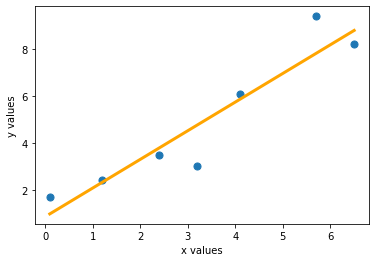

In [34]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color='orange', linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [35]:
# y_hat = theta0 + theta1 * x
y_hat = 0.8475351486029545 +1.2227264637835913 * x_5
print('Est value y_hat are: \n', y_hat)
print('In comparison, the actual y values are \n', y_5)

Est value y_hat are: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
In comparison, the actual y values are 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [36]:
def mse(y,y_hat):
    sub = 0
    for i in range(0,len(y)):
        sub = sub + (y[i] - y_hat[i])**2
    return (1/len(y)) * sub

def mse2(y,y_hat):
#     mse_calc = (1/y.size) * sum((y - y_hat)**2)
    mse_calc = np.average((y - y_hat)**2, axis=0)
    return mse_calc

In [37]:
print('Manually calculate MSE is', mse2(y_5,y_hat))
print('MSE regression using manel calc is', mean_squared_error(y_5,y_hat))
print('MSE regression is', mean_squared_error(y_5,regr.predict(x_5)))

Manually calculate MSE is [0.94796558]
MSE regression using manel calc is 0.9479655759794577
MSE regression is 0.9479655759794577


## D3 Plot for MSE Cost Function

### Make data for thetas

In [38]:
nr_thetas = 200
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_1, th_1)
plot_t0

array([[-1.        , -0.9798995 , -0.95979899, ...,  2.95979899,
         2.9798995 ,  3.        ],
       [-1.        , -0.9798995 , -0.95979899, ...,  2.95979899,
         2.9798995 ,  3.        ],
       [-1.        , -0.9798995 , -0.95979899, ...,  2.95979899,
         2.9798995 ,  3.        ],
       ...,
       [-1.        , -0.9798995 , -0.95979899, ...,  2.95979899,
         2.9798995 ,  3.        ],
       [-1.        , -0.9798995 , -0.95979899, ...,  2.95979899,
         2.9798995 ,  3.        ],
       [-1.        , -0.9798995 , -0.95979899, ...,  2.95979899,
         2.9798995 ,  3.        ]])

 ### Calc MSE using nested for loops

In [39]:
plot_cost = np.zeros((nr_thetas,nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
#         print(plot_t0[j][i])
        y_hat = plot_t0[i][j] + plot_t1[i][j]*x_5
        plot_cost[i][j] = mse2(y_5, y_hat)

print('Shape of plot_t0',plot_t0.shape)
print('Shape of plot_t1',plot_t1.shape)
print('Shape of plot_cost',plot_cost.shape)

Shape of plot_t0 (200, 200)
Shape of plot_t1 (200, 200)
Shape of plot_cost (200, 200)


In [40]:
# Nested loop practice
for i in range(3):
    for j in range(3):
        print(f'value of i is {i} and g is {j}')

value of i is 0 and g is 0
value of i is 0 and g is 1
value of i is 0 and g is 2
value of i is 1 and g is 0
value of i is 1 and g is 1
value of i is 1 and g is 2
value of i is 2 and g is 0
value of i is 2 and g is 1
value of i is 2 and g is 2


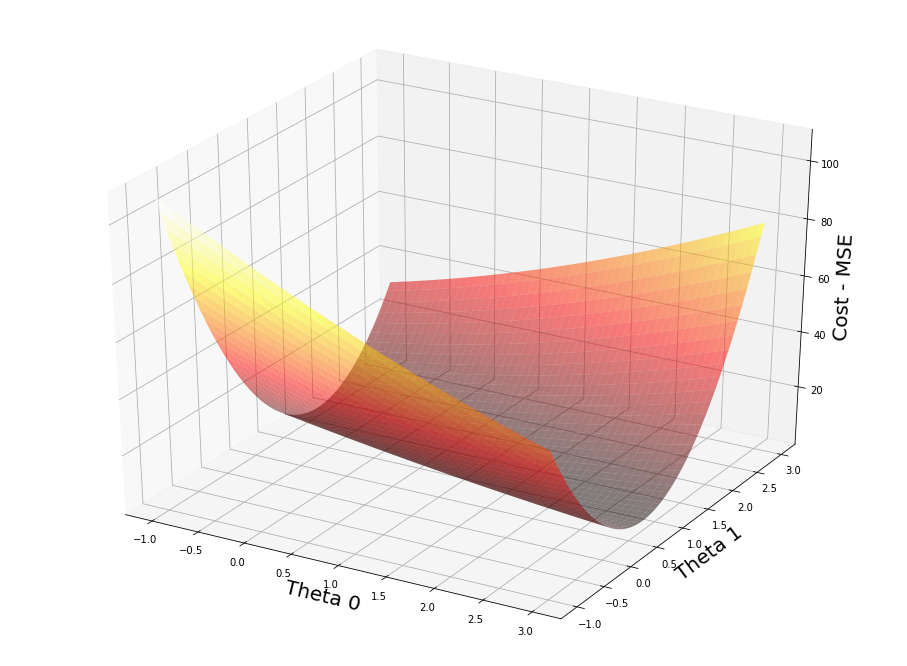

In [41]:
# Plotting MSE

fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap='hot', alpha=0.5)
plt.show()

In [42]:
print('Min value of plot_cost', plot_cost.min())
ij_min = np.unravel_index(indices=plot_cost.argmin(), shape=plot_cost.shape)
print('Min occurs at (i,j): ', ij_min)
print('Min MSE for Theta 0 in (111, 91): ', plot_t0[111][91])
print('Min MSE for Theta 1 in (111, 91): ', plot_t1[111][91])

Min value of plot_cost 0.9483826526747164
Min occurs at (i,j):  (111, 91)
Min MSE for Theta 0 in (111, 91):  0.829145728643216
Min MSE for Theta 1 in (111, 91):  1.2311557788944723


## Partial Derivatives of MSE w.r.t $ \theta_0 $ AND $\theta_1$

## $$\frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)$$

## $$\frac{\partial MSE}{\partial \theta_1} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)\big(x^{(i)}\big)$$

##  MSE & Gradient Descent

In [43]:
# x values, y values, array of theta parameters

def grad(x,y, thetas):
    n = y.size
    
#     theta0_slope = 2 * np.average((y - thetas[0] - tethas[1]))*x, axis=0)
#     theta1_slope = 2 * np.average((y - thetas[0] - tethas[1]))*x, axis=0) * x
    
    theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1]*x)
    theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1]*x)*x)
    
    return np.array([theta0_slope[0], theta1_slope[0]])

In [44]:
multiplier = 0.01
thetas = np.array([2.9,2.9])

# Collect data point for scatter plot
plot_vals = thetas.reshape(1,2)
mse_vals = mse2(y_5, thetas[0] + thetas[1] * x_5)


for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)
    
    #Append the news values to our numpy arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1,2)), axis=0)
    mse_vals = np.append(arr = mse_vals, values=mse(y_5, thetas[0] + thetas[1]*x_5))
    
#results
print('Min occurs at Theta 0: ', thetas[0])
print('Min occurs at Theta 1: ', thetas[1])
print('MSE is:', mse2(y_5, thetas[0] + thetas[1] * x_5))

Min occurs at Theta 0:  0.8532230461743415
Min occurs at Theta 1:  1.2214935332607393
MSE is: [0.94797511]


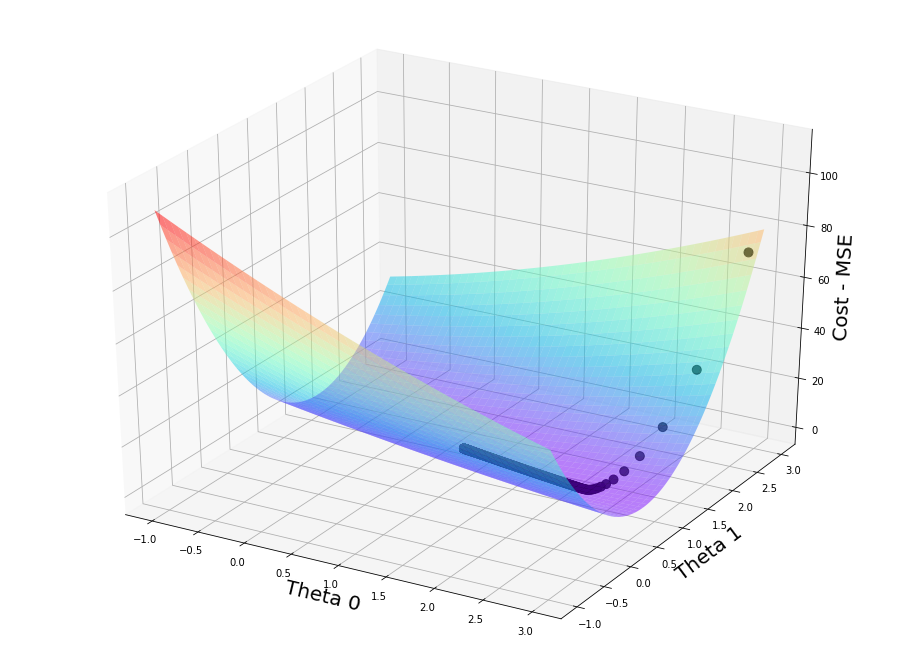

In [45]:
# Plotting MSE

fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.scatter(plot_vals[:,0],plot_vals[:,1], mse_vals, s=80, color='black')
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap='rainbow', alpha=0.5)
plt.show()